<a href="https://colab.research.google.com/github/deenyse/VSB_ZSU/blob/main/Copy_of_UASS_5_21_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analýza větších sítí

> Cílem cvičení je vyzkoušet si analyzovat větší sítě s využitím poznatků z minulých cvičení, tj. vizualizovat síť, vlastnosti, komunity, apod.


## Část 1: Struktury v sítí

1. Sítě

  - Vyberte si alespoň 2 větší sítě [large_data.zip](https://h`omel.vsb.cz/~kud007/data/large_data.zip)

2. Analyzujte síť, výstupem by měl být dokument, kde shrnete získané poznatky

In [ ]:
import random
import networkx as nx

import pandas as pd
import numpy as np

def find_components(G):
    return list(nx.connected_components(G))


def find_cliques(G, min_size=3):
    clique_nodes = set()
    for clique in nx.find_cliques(G):
        if len(clique) >= min_size:
            clique_nodes.update(clique)
    return clique_nodes


def find_stars(G, degree_percentile=80, leaf_density_threshold=0.2):
    degrees = [G.degree(n) for n in G]
    min_degree = np.percentile(degrees, degree_percentile)
    star_nodes = set()
    for node in G:
        if G.degree(node) < min_degree:
            continue
        neighbors = list(G.neighbors(node))
        if len(neighbors) < 3:
            continue
        if nx.density(G.subgraph(neighbors)) <= leaf_density_threshold:
            star_nodes.add(node)
    return star_nodes



In [ ]:
def color_nodes(G, nodes, color, node_type=None):
    for n in nodes:
        if n not in G.nodes:
            continue
        G.nodes[n]["color"] = color
        if node_type:
            G.nodes[n]["type"] = node_type


def export_to_gephi(G: nx.Graph, path: str = "graph_colored.gexf"):
    nx.write_gexf(G, path)



In [ ]:
# Function for network analysis
def analyze_network(file_path, network_name):
    print(f"\n=== Results for network: {network_name} ===")

    try:
        # Read the graph in GEXF format
        G = nx.read_gexf(file_path)

        # Basic metrics
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
        components = find_components(G)
        clique_nodes = find_cliques(G, min_size=4)
        star_nodes = find_stars(G, degree_percentile=80, leaf_density_threshold=0.2)

        # Node coloring and export
        nx.set_node_attributes(G, "default", "type")
        nx.set_node_attributes(G, "gray", "color")
        color_nodes(G, clique_nodes, "#ff0000", "clique")
        color_nodes(G, star_nodes, "#00ccff", "star")
        export_to_gephi(G, f"{network_name}_colored.gexf")

        # Print results
        print(f"Number of nodes: {num_nodes}")
        print(f"Number of edges: {num_edges}")
        print(f"Average node degree: {avg_degree:.2f}")
        print(f"Number of connected components: {len(components)}")
        print(f"Number of nodes in cliques (min_size=4): {len(clique_nodes)}")
        print(f"Number of nodes in stars: {len(star_nodes)}")

    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")

# Analyze two networks
networks = [
    ("Ernon.csv", "Enron"),
    ("Facebook.csv", "Facebook")
]

for file_path, network_name in networks:
    analyze_network(file_path, network_name)



=== Results for network: Enron ===
Number of nodes: 34
Number of edges: 78
Average node degree: 4.59
Number of connected components: 1
Number of nodes in cliques (min_size=4): 12
Number of nodes in stars: 4

=== Results for network: Facebook ===
Number of nodes: 77
Number of edges: 254
Average node degree: 6.60
Number of connected components: 1
Number of nodes in cliques (min_size=4): 48
Number of nodes in stars: 1


| Vlastnost                   |  Enron   |  Facebook   |
| :-------------------------- | :------- | :---------- |
| **Počet vrcholů**           | 34       | 77          |
| **Počet hran**              | 78       | 254         |
| **Hustota sítě**            | 0.140    | 0.086       |
| **Průměrný stupeň**         | 4.59     | 6.60        |
| **Maximální stupeň**        | 5038     | 1045        |
| **Průměrný shluk. koef.**   | 0.497    | 0.303       |
| **Počet komponent**         | 1        | 1           |
| **Počet vrcholů v klike (min_size=4)**|12     |  48  |
| **Počet hvězd**             | 4        | 1           |



## Část 2: Porovnejte výsledky
### 1. Jaký typ rozložení vrcholů byl použit a proč je pro danou síť vhodný?
- Enron: ForceAtlas 2
- Facebook: Yifan Hu


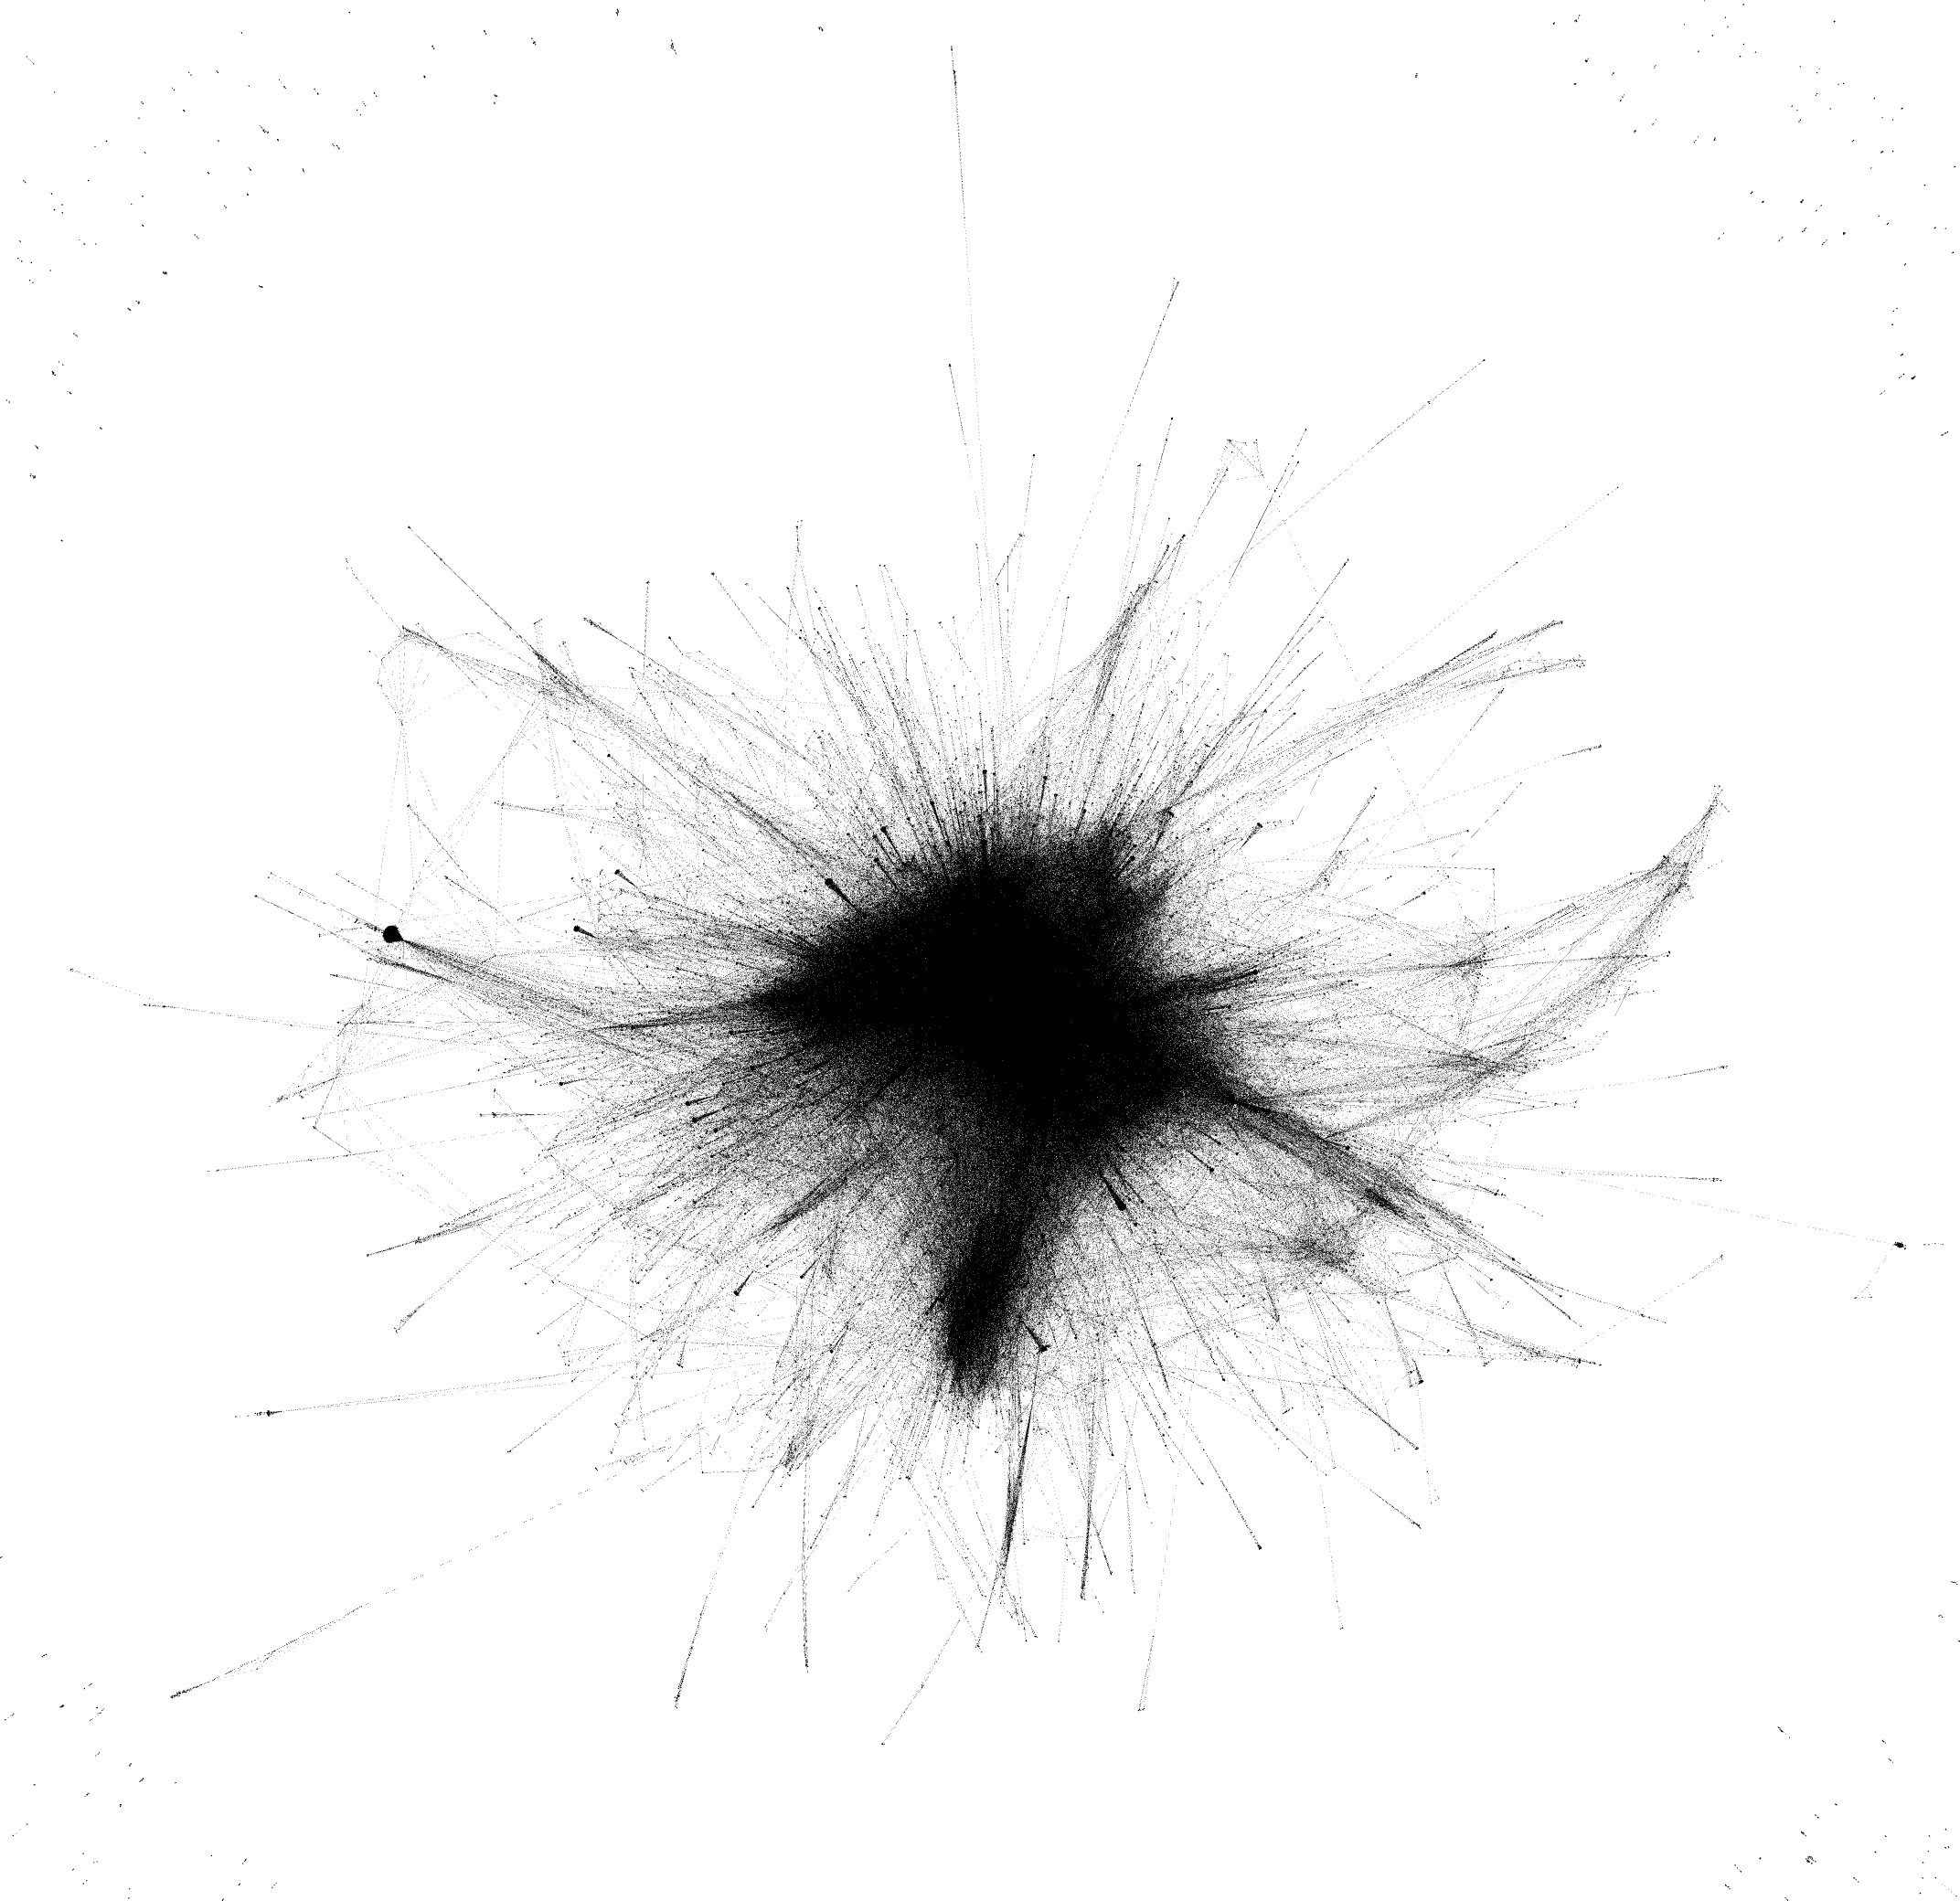

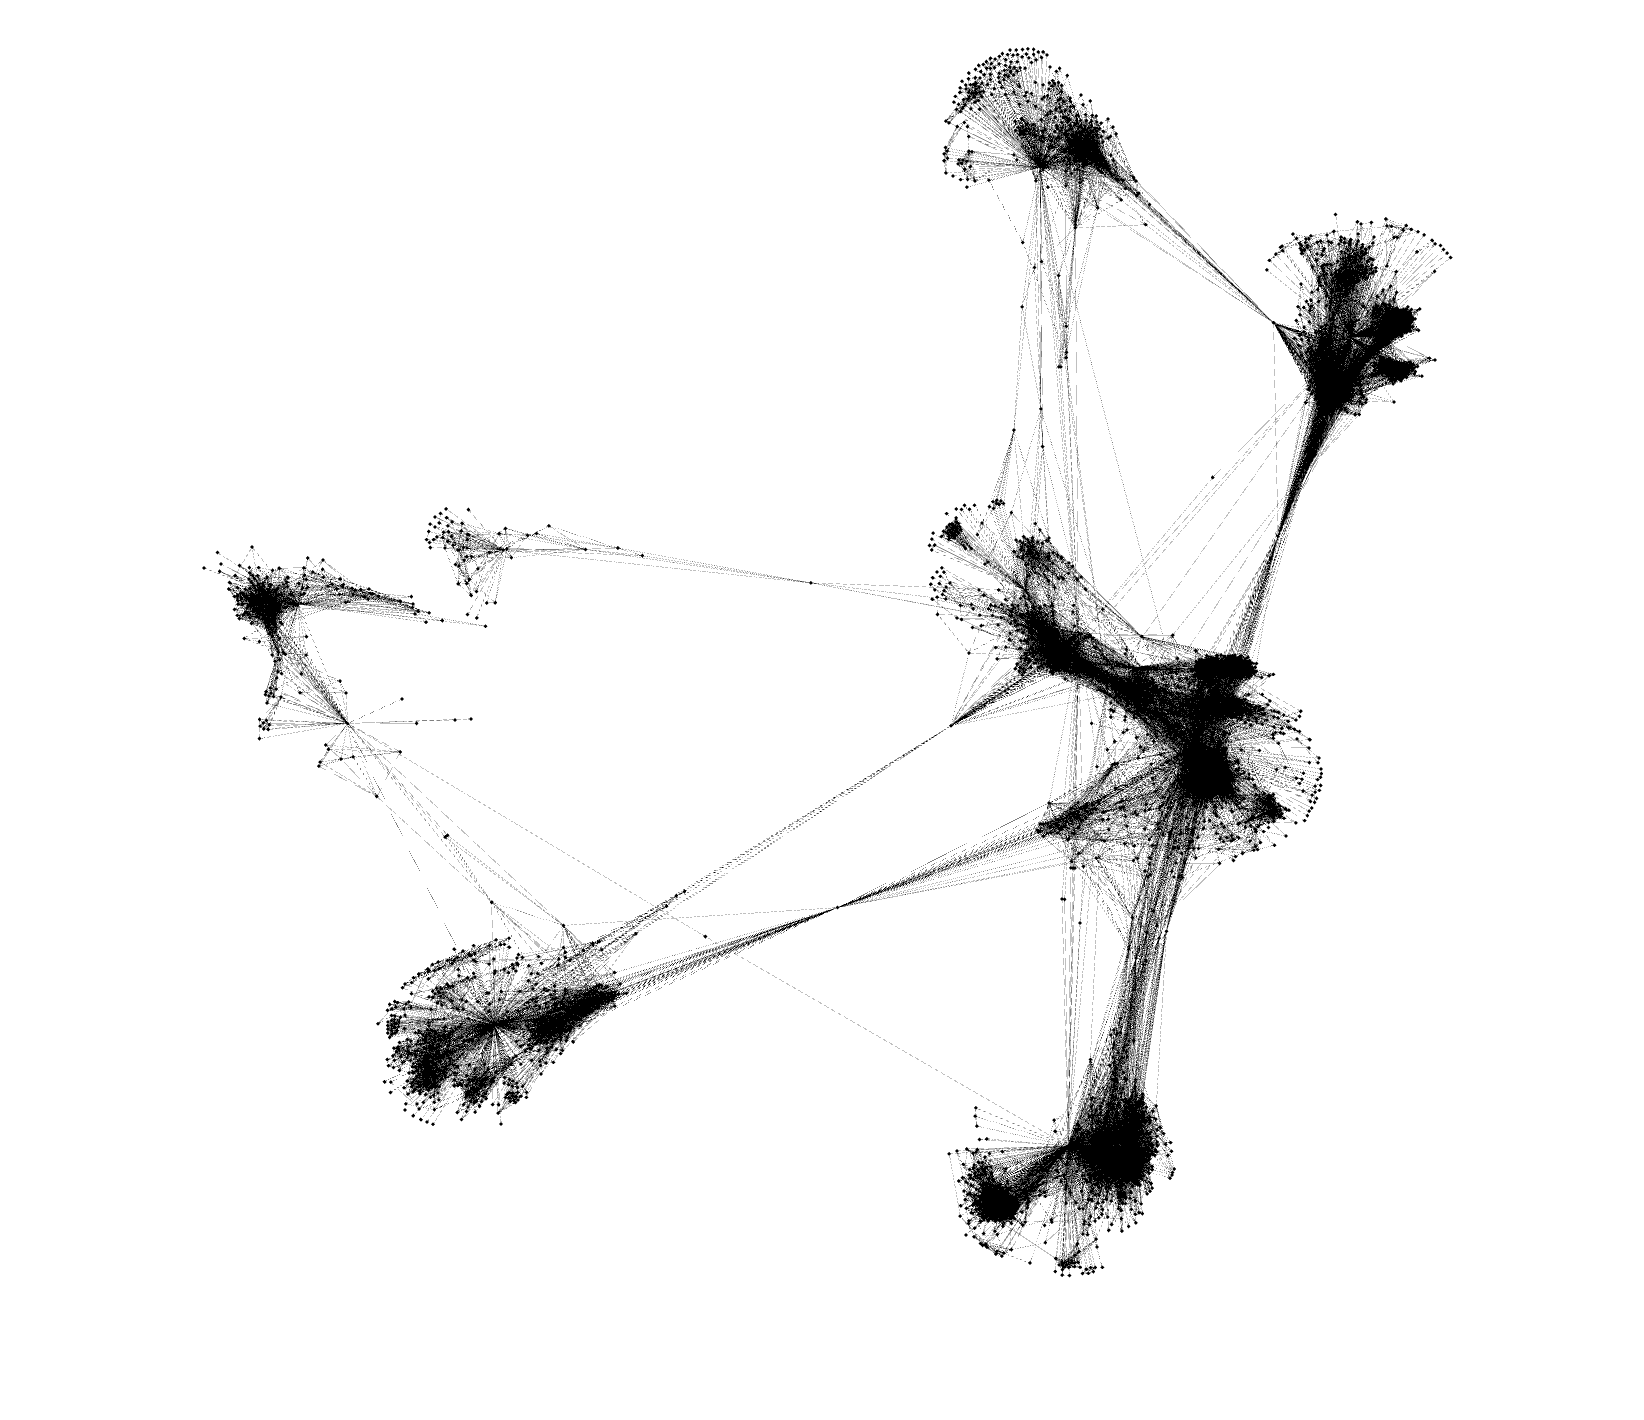


### 2. Které vrcholy mají nejvíce hran a jaký význam to může mít pro propojení v síti?

|    Network    | Node ID | Degree |        
| :------------ | :------ | :----- |
| Enron         | 5038    | 2766   |
| Enron         | 273     | 2734   |
| Enron         | 458     | 2522   |
| Enron         | 140     | 2490   |
| Enron         | 1028    | 2488   |
| Enron         | 195     | 2286   |
| Enron         | 370     | 2198   |
| Enron         | 1139    | 2136   |
| Enron         | 136     | 2052   |
| Facebook      | 107     | 1045   |
| Facebook      | 1684    | 792    |
| Facebook      | 1912    | 755    |
| Facebook      | 3437    | 547    |
| Facebook      | 0       | 347    |
| Facebook      | 2543    | 294    |
| Facebook      | 2347    | 291    |

Enron:

- Uzly s nejvyšším stupněm: 5038, 273, 458, 140, 1028, 195, 370, 1139, 136

- Stupeň uzlů klesá postupně, takže síť má několik dobře propojených hubů, ale žádný výrazně dominantní uzel.

- Význam: tyto uzly společně udržují propojení sítě, jejich odstranění by částečně snížilo propojenost, ale síť by byla stále relativně propojená díky dalším hubům.

Facebook:

- Uzly s nejvyšším stupněm: 107, 1684, 1912, 3437, 0, 2543, 2347

- Stupeň uzlů klesá prudce, jeden nebo dva uzly (např. 107) mají výrazně více spojení než ostatní → tvoří dominantní „huby“.

- Význam: tyto uzly jsou kritické pro propojení sítě, odstranění hlavních hubů by vedlo k silnému fragmentování a ztrátě soudržnosti.

✅ Shrnutí významu:

- Enron: několik dobře propojených hubů, propojenost sítě relativně stabilní.

- Facebook: výrazné dominantní huby, jejich odstranění má dramatický dopad na propojení a soudržnost sítě.

---
### 3. Kolik má síť vrcholů a hran, jaký je průměrný počet hran na vrchol a co to vypovídá o její struktuře?

- Enron: 34 uzlů, 78 hran, průměrný stupeň 4,59 → řidší síť.

- Facebook: 77 uzlů, 254 hran, průměrný stupeň 6,60 → hustší síť.

---
### 4. Jak daleko jsou od sebe průměrně jednotlivé vrcholy a co to říká o propojenosti sítě?
- Počet uzlů v klikách (min_size=4): Enron 12, Facebook 48 → skupiny existují.

---
### 5. Existují v síti skupiny vrcholů, které jsou mezi sebou více propojené?
- Enron: 12 uzlů v klike, Facebook: 48 → Facebook má větší skupiny, což naznačuje výraznější komunity.

---
### 6. Jsou tyto skupiny tvořené podobným počtem vrcholů nebo se výrazně liší a co by to mohlo znamenat?

  - Enron: 4 „hvězdy“, Facebook: 1 „hvězda“.
  - Kliky a hvězdy ukazují na přítomnost hustě propojených podskupin a centrálních uzlů.

---
### 7. Které vrcholy propojují různé části sítě a jakou roli v ní mohou hrát?

  - Enron: méně propojená síť.

  - Facebook: více propojená síť, silné komunity.

---
### 8. Jaké typické struktury lze v síti pozorovat?

Enron:

- Síť obsahuje několik hvězd (4) a kliky s minimálně 4 uzly (12 uzlů).

- Hvězdy ukazují na centrální uzly, které propojují menší skupiny, zatímco kliky představují těsně propojené podskupiny.

- Celková struktura je méně centralizovaná, více rovnoměrně propojená.

Facebook:

- Síť obsahuje 1 hvězdu a velké kliky (48 uzlů).

- Hvězda a dominantní hub (uzel 107) ukazují na silně centralizovaný uzel, kolem kterého se soustředí propojení.

- Velké kliky naznačují těsně propojené komunity, takže síť je centralizovaná a komunitně strukturovaná.

✅ Shrnutí:

- Enron: menší hvězdy, malé kliky → rovnoměrnější, méně centralizovaná síť.

- Facebook: velká hvězda, rozsáhlé kliky → centralizovaná síť s výraznými komunitami.

---
### 9. Jak by se změnila síť, pokud by byly odstraněny vrcholy s největším počtem hran?

Enron:

- Síť má několik dobře propojených hubů, jejich stupeň klesá postupně.

- Odstranění uzlů s nejvyšším počtem hran by částečně snížilo propojenost, některé části sítě by se mohly oslabit, ale síť by zůstala relativně propojená, protože existují další uzly s vysokou mírou propojení.

Facebook:

- Síť je silně centralizovaná kolem několika dominantních hubů (např. uzel 107).

- Odstranění těchto hlavních uzlů by vedlo k výrazné fragmentaci sítě, mnoho komunit by se izolovalo a celková soudržnost sítě by se dramaticky snížila.

✅ Shrnutí:

- Enron: odstranění hubů s vysokým stupněm má mírný dopad na propojení.

- Facebook: odstranění dominantních hubů má kritický dopad, síť se výrazně rozpadá.

---
### 10. Jak na základě propojení vrcholů popsat soudržnost sítě a vztahy mezi jejími částmi?

Enron:

- Síť má relativně rovnoměrně propojené huby, stupeň uzlů klesá postupně.

- Existují některé kličky a hvězdy, ale žádný dominantní uzel → síť je relativně soudržná, komunikace probíhá přes několik centrálních bodů.

- Vztahy mezi částmi sítě jsou rovnoměrně rozloženy, odstranění jednotlivých hubů sice sníží propojení, ale síť zůstává relativně propojená.

Facebook:

- Síť má silně dominantní huby (např. uzel 107), stupeň dalších uzlů klesá prudce.

- Existují velké kliky a některé hvězdy, což ukazuje na těsně propojené komunity kolem hlavních hubů.

- Vztahy mezi částmi sítě jsou silně závislé na několika hlavních uzlech, odstranění těchto hubů by vedlo k fragmentaci a oslabení soudržnosti.

✅ Shrnutí:

- Enron: síť je méně centralizovaná, více rovnoměrně propojená, stabilní proti odstranění jednotlivých uzlů.

- Facebook: síť je centralizovaná kolem hlavních hubů, propojení komunit závisí na nich, struktura je zranitelná vůči odstranění dominantních uzlů.